In [1]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rc
import numpy as np
import random as rd

In [2]:
rc('animation', html='html5') #para poder ver la animacion en formato inline
from IPython.display import HTML

**Metodo de Montecarlo para calcular $\pi$.**

Grafico un circulo de radio $0.5$, y un cuadrado de lado $1$, ambos centrados en el origen.

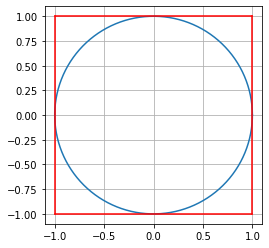

In [3]:
t = np.linspace(0, 2*np.pi, 500)
x = np.cos(t)
y = np.sin(t)

l = np.linspace(-1, 1, 500)

#fig = plt.figure()

plt.plot(x, y)
plt.plot(l, 0*l-1, "r")
plt.plot(l, 0*l+1, "r")
plt.plot(0*l-1, l, "r")
plt.plot(0*l+1, l, "r")
plt.gca().set_aspect('equal', adjustable='box')


plt.grid()
plt.show()

El área del cuadrado es $1^2 = 1$ y el del circulo es $\pi/4$. Así, la proporción de área del cuadrado que esta dentro del circulo es de $\frac{\pi/4}{1} = \pi/4$.

Si se graficaran puntos en el plano al azar, con distribución uniforme dentro del cuadrado, la proporción de puntos dentro del circulo respecto a la cantidad de puntos totales tendería a $\pi/4$.

Mi aproximador de $\pi$ será $\widetilde{\pi} = 4\frac{n_c}{n}$, siendo $n$ la cantidad de puntos totales, y $n_c$ la cantidad de puntos que cayeron dentro del circulo. Para un $n$ grande, $\widetilde{\pi} \approx \pi$.


In [4]:
def muestra_puntos(n): 
    """Genera n pares de coordenadas con distribucion uniforme entre el -1 y 1"""
    puntos = np.random.uniform(-1, 1, (2, n))
    
    return puntos

In [5]:
def puntosDentro(p):
    """Genera un arreglo en donde el elemento i tiene un 1 si la i-esima tupla de puntos pasada por parámtero está dentro del circulo de radio 1, y un 0 sino."""
    dentro_o_fuera = ((p[0]**2 + p[1]**2) <= 1).astype(int)

    return dentro_o_fuera

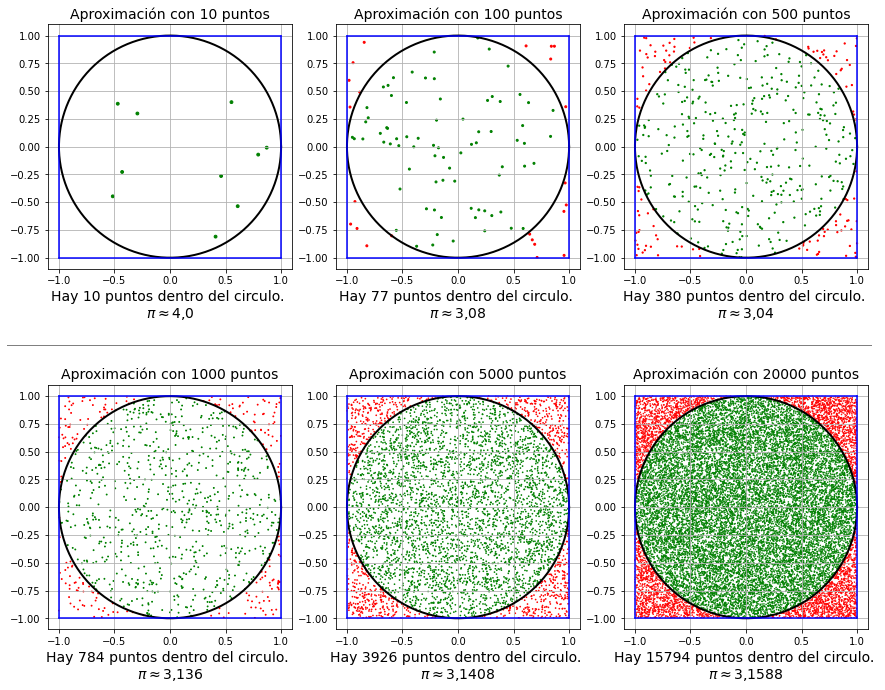

In [6]:
f, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 10), constrained_layout=True)

cantidadPuntos = [10, 100, 500, 1000, 5000, 20000]
n = 0

for i in range(1, 3):
    for j in range(1, 4):
        puntos = muestra_puntos(cantidadPuntos[n])
        dentro_o_fuera = puntosDentro(puntos)
        puntos_dentro_del_circulo = dentro_o_fuera.sum()
        proporcion = puntos_dentro_del_circulo/dentro_o_fuera.shape[0]
        
        col = np.where(dentro_o_fuera == 1, 'g', 'r')
        axes[i-1,j-1].scatter(puntos[0], puntos[1], c = col, s = 8/(n**2+1))
        
        axes[i-1,j-1].plot(x, y, color = "black", linewidth = 2)
        axes[i-1,j-1].plot(l, 0*l-1, "b")
        axes[i-1,j-1].plot(l, 0*l+1, "b")
        axes[i-1,j-1].plot(0*l-1, l, "b")
        axes[i-1,j-1].plot(0*l+1, l, "b")
        
        axes[i-1,j-1].set_aspect('equal')
        axes[i-1,j-1].grid()
        
        titulo = f"Aproximación con {cantidadPuntos[n]} puntos".replace(',','.')
        subtitulo = f"Hay {puntos_dentro_del_circulo} puntos dentro del circulo. \n".replace(',','.') 
        subtitulo += r"$\pi \approx $" + str(4*proporcion).replace('.',',')
        
        axes[i-1,j-1].set_title(titulo, fontsize = 14)
        axes[i-1, j-1].set_xlabel(subtitulo, fontsize = 14)
        n = n+1
plt.plot([0, 1], [0.48, 0.48], color='grey', lw=1, transform=plt.gcf().transFigure, clip_on=False)

**Animacion.**

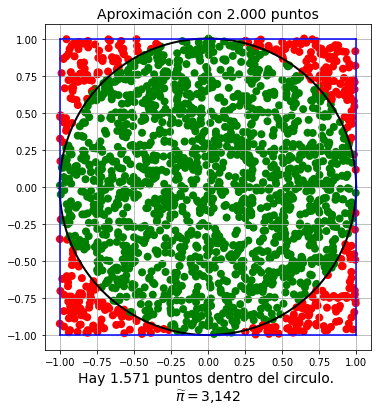

In [64]:
fig = plt.figure(figsize=(6,6))
ax = plt.axes(xlim=(-1, 1), ylim=(-1, 1))


xdata, ydata = [], []

line = ax.scatter(xdata, ydata, lw=2)

ax.plot(x, y, color = "black", linewidth = 2)
ax.plot(l, 0*l-1, "b")
ax.plot(l, 0*l+1, "b")
ax.plot(0*l-1, l, "b")
ax.plot(0*l+1, l, "b")
ax.set_aspect('equal')
ax.grid()

puntos = muestra_puntos(20000)
dentro_o_fuera = puntosDentro(puntos)
col = np.where(dentro_o_fuera == 1, 'g', 'r')

def init():
    line.set_offsets(puntos[1].reshape(-1, 2))
    return line, 
i = 1

def update_plot(i):
    i = i+1 # to not start in zero
    present_dots = np.transpose(puntos[:, :i])
    
    #dot = puntos(1)
    #dot = (dot[0][0], dot[1][0])
    #dots.append(dot)
    
    #line.set_offsets(dots)
    line.set_offsets(present_dots)
    
    #if (dot[0]**2 + dot[1]**2) <= 1:
    #    np.append(col, 'g')
    #else:
    #    np.append(col, 'r')
        
    line.set_color(col[:i+1])
    
    dotsDentro = dentro_o_fuera[:i+1].sum()
    proporcion = dotsDentro/i
    
    titulo = f"Aproximación con {present_dots.shape[0]:,} puntos".replace(',','.')
    subtitulo = f"Hay {dotsDentro:,} puntos dentro del circulo. \n".replace(',','.')
    subtitulo += r"$\widetilde{\pi} = $" + str(4*proporcion).replace('.',',')

    ax.set_title(titulo, fontsize = 14)
    ax.set_xlabel(subtitulo, fontsize = 14)
    
    
    return line,

plt.autoscale()

anim = animation.FuncAnimation(fig, update_plot, init_func = init, frames=2000, blit = True)
Writer = animation.writers['ffmpeg']
writer = Writer(metadata=dict(artist='Me'), bitrate=1800)

anim.save(r"animacion.mp4", dpi = 300, writer = writer)